In [15]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_results(l):
    fig, ax = plt.subplots(1, 1, figsize=(9, 5))

    ax.set_title(f'Per Period Regret vs Rounds for f-dsw-ts with l={l}')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Regret')

    for gamma in (0.0, 0.1, 0.5, 1.0, 1.5):
        base_path = f'../../../../results/f-dsw-ts-experiment-vs-gamma/49/gamma:{gamma}_l:{l}/'
        df = pd.read_parquet(base_path + 'per_period_regret.parquet')

        ax.plot(df['per_period_regret'])
    ax.legend(['gamma = 0.0', 'gamma = 0.1', 'gamma = 0.5', 'gamma = 1.0', 'gamma = 1.5']);

## Анализ регрета алгоритма f-dsw-ts в зависимости от величины гиперпараметра $\gamma$

Анализируется влияния коэффициента дисконтирования $\gamma$ на "обучаемость" (отлавливание моментов изменения параметризации и схождение регрета к нулю после этого) алгоритма f-dsw-ts. Напомним, что у исследуемого улагоритма есть два набора параметров - historic_trace, отвечающий за всю историю наблюдений, и hot_trace, учитывающий лишь последние наблюдения фиксированного размера. Коэффициент дисконтирования $\gamma$ на каждом раунде эксперимента домножается на historic_trace, тем самым регулируя вклад всей истории наблюдений на выбираемые ручки. 

**Проверяемые предположения:** 
- Варьирование параметра $\gamma$ влияет на скорость обучения, которая выражается в изменении регрета с течением времени. 
- Число одновременно выбираемых ручек $l$ влияет на оптимальное (в смысле минимума регрета) значение window_size


**Экспериментальная установка**
- Алгоритм: *f-dsw-ts*
- Модель пользователя: *sudden_bandit*
- Гиперпараметр *window_size*: 50 (единый для всех серий триалов)
- Параметризация модели пользователя: 
    -  первоначальная: [0.0, 0.0, 0.1, 0.3]
    -  после 250 раунда: [0.7, 0.0, 0.1, 0.3]
    -  после 500 раунда: [0.7, 0.9, 0.1, 0.3]
- Число одновременно выбираемых ручек $l$: [1, 2, 3] (применяется для каждого значения *window_size*)
- Количество раундов в рамках одного триала: *2000*
- Число триалов для каждой комбинации параметров *$\gamma$* и $l$: *100*


**Варьируемый параметр:**
-  $\gamma$: [0.0, 0.1, 0.5, 1.0, 1.5]


Стоит отметить, что принято варьировать коэффициент дисконтирования в интервале (0, 1), однако в настоящем в эскперименте предлагается проанализировать граничные случаи 0 (полностью отключаем историю) и 1.5 (усиливаем фактор истории).


Эксперимент реализован средствами MLDev, конфигурация доступна [здесь](https://gitlab.com/mlrep/mldev-recommender-systems/-/tree/anton_experiments/experiments/anton_experiments/experiment_1/series_2).

## Визуализация результатов эксперимента

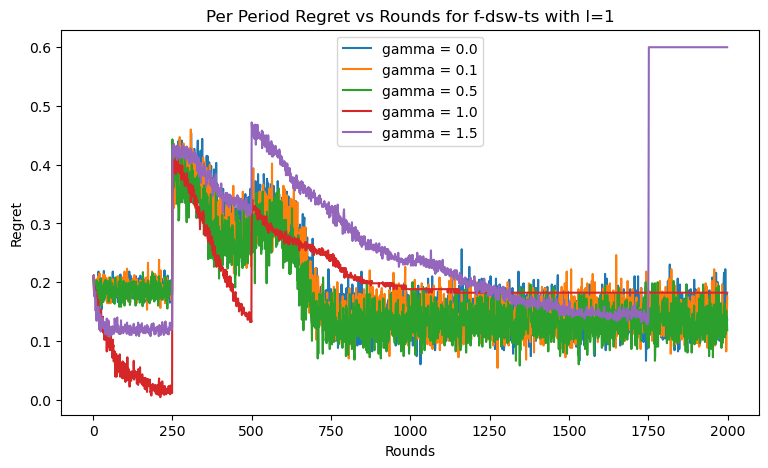

In [16]:
plot_results(1)

Рассмотрим график регрета при $l=1$. Видно, что ослабление влияния истории (соответствует коэффициентам дисконтирования 0, 0.1, 0.5) ведет к худшей обучаемости алгоритма с точки зрения значения регрета. Кроме того, для этих значений дисперсия регрета, усредненного по триалам, заметно выше, нежели значением $\gamma = \{1.0, 1.5\}$.

С другой стороны, после второго изменения параметризации красная линия перестает быть оптимальной. 

Также наблюдается "взрыв" регрета для $\gamma = 1.5$

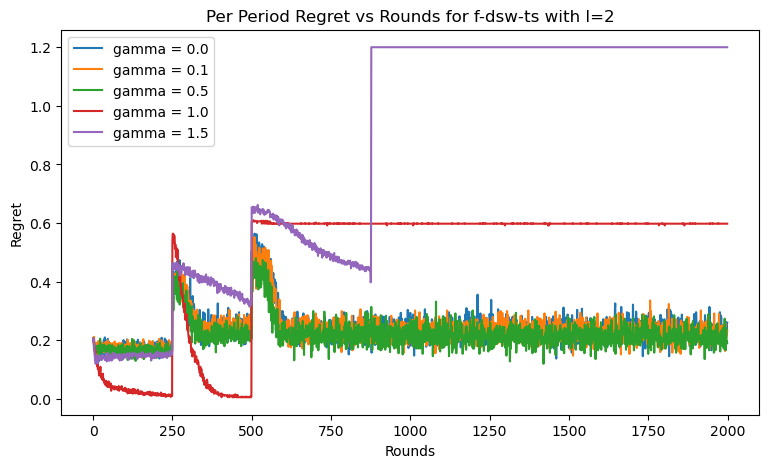

In [17]:
plot_results(2)

Для значений $\gamma\in(0.0, 0.1, 0.5)$ поведение сохраняется и для $l=2$.
Интересен момент, что после второго переключения параметризации красная линия перестала как-либо обучаться. При этом фиолетовая линия первые ~400 раундов после второго переключения демонстрирует даже лучшие результаты, однако далее результат вырождается.

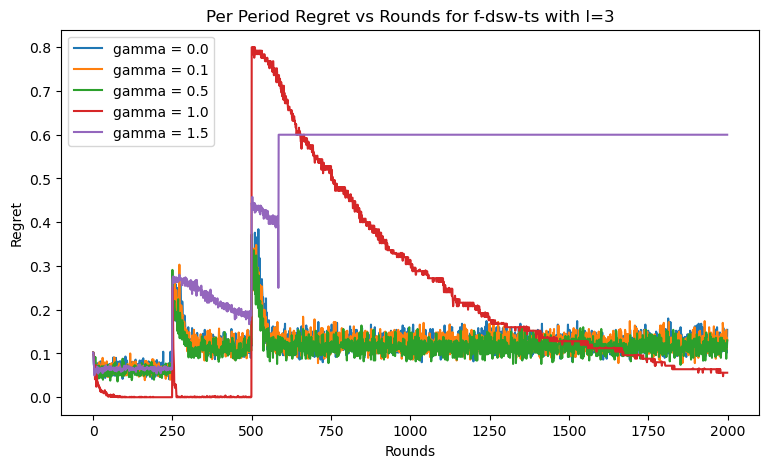

In [18]:
plot_results(3)

При $l=3$, начиная с ~1500 раунда, красная линия начинает показывать лучшие результаты, чем все остальные кривые. В остальном поведение кривых совпадает с предыдущими значениями $l$.

## Выводы
- Параметр $\gamma$ влияет на скорость обучения, а также на умение отлавливать изменения интересов.
- График, соответствующий случаю полного отключения historic_trace, имеет схожий с $\gamma\in\{0.1, 0.5\}$.
- При коэффициенте дисконтирования >1 в какой-то момент регрет резко "взрывается" и далее принимает константные значения до конца эксперимента. Связано это, вероятнее всего, с переполнением значений параметров historic_trace.
- Кол-во одновременно выбираемых ручек $l$ имеет прямое влияние на выбор параметра $\gamma$.


Стоит отметить, что согласно проведенному эксперименту, коэффициент дисконтирования $\gamma$ следует выбирать близким к единице.